In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import joblib

In [61]:
df = pd.read_csv("D:\\Project\\new_projects\\Anomaly_Detection\\financial_anomaly_data.csv") 

In [62]:
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
217436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217439,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Rename columns
df.rename(columns={'TransactionID_Suffix': 'TransactionID', 
                   'AccountID_Suffix': 'AccountID', 
                   'Merchant_Suffix': 'Merchant'}, inplace=True)

# Display the DataFrame with renamed columns
df.head() 

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


In [64]:
null_values = df.isnull().sum()
print(null_values)

Timestamp          481
TransactionID      481
AccountID          481
Amount             481
Merchant           481
TransactionType    481
Location           481
dtype: int64


In [65]:
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14688\3193425471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].mean(), inplace=True)


In [66]:
for column in ['TransactionType', 'Location', 'Timestamp','TransactionID', 'AccountID', 'Merchant']:
    df[column].fillna(df[column].mode()[0], inplace=True) 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14688\1956137568.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [67]:
df.isnull().sum() 

Timestamp          0
TransactionID      0
AccountID          0
Amount             0
Merchant           0
TransactionType    0
Location           0
dtype: int64

In [68]:
df 

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.920000,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.890000,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.340000,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.870000,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.560000,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
217436,01-01-2023 08:00,TXN1658,ACC15,50090.025108,MerchantF,Transfer,San Francisco
217437,01-01-2023 08:00,TXN1658,ACC15,50090.025108,MerchantF,Transfer,San Francisco
217438,01-01-2023 08:00,TXN1658,ACC15,50090.025108,MerchantF,Transfer,San Francisco
217439,01-01-2023 08:00,TXN1658,ACC15,50090.025108,MerchantF,Transfer,San Francisco


In [69]:
# List of features
features = ['TransactionType', 'Location', 'TransactionID', 'AccountID', 'Merchant']

# Print unique values and count for each feature sorted in ascending order
for feature in features:
    unique_values = df[feature].unique()
    unique_values_sorted = sorted(unique_values)
    num_unique_values = len(unique_values)
    print(f"Unique values in '{feature}' (sorted in ascending order): {unique_values_sorted}")
    print(f"Number of unique values in '{feature}': {num_unique_values}")


Unique values in 'TransactionType' (sorted in ascending order): ['Purchase', 'Transfer', 'Withdrawal']
Number of unique values in 'TransactionType': 3
Unique values in 'Location' (sorted in ascending order): ['London', 'Los Angeles', 'New York', 'San Francisco', 'Tokyo']
Number of unique values in 'Location': 5
Unique values in 'TransactionID' (sorted in ascending order): ['TXN1', 'TXN10', 'TXN100', 'TXN1000', 'TXN1001', 'TXN1002', 'TXN1003', 'TXN1004', 'TXN1005', 'TXN1006', 'TXN1007', 'TXN1008', 'TXN1009', 'TXN101', 'TXN1010', 'TXN1011', 'TXN1012', 'TXN1013', 'TXN1014', 'TXN1015', 'TXN1016', 'TXN1017', 'TXN1018', 'TXN1019', 'TXN102', 'TXN1020', 'TXN1021', 'TXN1022', 'TXN1023', 'TXN1024', 'TXN1025', 'TXN1026', 'TXN1027', 'TXN1028', 'TXN1029', 'TXN103', 'TXN1030', 'TXN1031', 'TXN1032', 'TXN1033', 'TXN1034', 'TXN1035', 'TXN1036', 'TXN1037', 'TXN1038', 'TXN1039', 'TXN104', 'TXN1040', 'TXN1041', 'TXN1042', 'TXN1043', 'TXN1044', 'TXN1045', 'TXN1046', 'TXN1047', 'TXN1048', 'TXN1049', 'TXN105

In [70]:
# List of categorical features
categorical_features = ['TransactionType', 'Location', 'AccountID', 'Merchant']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_features)

df


,Timestamp,TransactionID,Amount,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,Location_London,Location_Los Angeles,Location_New York,Location_San Francisco,...,Merchant_MerchantA,Merchant_MerchantB,Merchant_MerchantC,Merchant_MerchantD,Merchant_MerchantE,Merchant_MerchantF,Merchant_MerchantG,Merchant_MerchantH,Merchant_MerchantI,Merchant_MerchantJ
0,01-01-2023 08:00,TXN1127,95071.920000,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,01-01-2023 08:01,TXN1639,15607.890000,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,01-01-2023 08:02,TXN872,65092.340000,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,01-01-2023 08:03,TXN1438,87.870000,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,01-01-2023 08:04,TXN1338,716.560000,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217436,01-01-2023 08:00,TXN1658,50090.025108,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
217437,01-01-2023 08:00,TXN1658,50090.025108,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
217438,01-01-2023 08:00,TXN1658,50090.025108,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
217439,01-01-2023 08:00,TXN1658,50090.025108,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [71]:
# Assuming 'Timestamp' column has inconsistent date formats, specify them explicitly
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce', format='%d-%m-%Y %H:%M')

# Extract hour from the 'Timestamp' feature
df['Hour'] = df['Timestamp'].dt.hour

# Analyze transaction counts by hour
hourly_counts = df['Hour'].value_counts().sort_index()

# Calculate mean and standard deviation of transaction counts
mean_transactions = hourly_counts.mean()
std_transactions = hourly_counts.std()

# Define threshold for identifying unusual hours (e.g., 2 standard deviations from the mean)
threshold = mean_transactions + 2 * std_transactions

# Identify unusual hours
unusual_hours = hourly_counts[hourly_counts > threshold]

# Print unusual hours and their corresponding transaction counts
print("Unusual hours with higher transaction counts:")
print(unusual_hours) 

Unusual hours with higher transaction counts:
Hour
8    9541
Name: count, dtype: int64


In [72]:
# Drop the 'TransactionID' column
df.drop(columns=['TransactionID'], inplace=True)

# Print the DataFrame to confirm the changes
print(df.head())

            Timestamp    Amount  TransactionType_Purchase  \
0 2023-01-01 08:00:00  95071.92                      True   
1 2023-01-01 08:01:00  15607.89                      True   
2 2023-01-01 08:02:00  65092.34                     False   
3 2023-01-01 08:03:00     87.87                      True   
4 2023-01-01 08:04:00    716.56                      True   

   TransactionType_Transfer  TransactionType_Withdrawal  Location_London  \
0                     False                       False            False   
1                     False                       False             True   
2                     False                        True             True   
3                     False                       False             True   
4                     False                       False            False   

   Location_Los Angeles  Location_New York  Location_San Francisco  \
0                 False              False                   False   
1                 False             

In [73]:
df

,Timestamp,Amount,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,Location_London,Location_Los Angeles,Location_New York,Location_San Francisco,Location_Tokyo,...,Merchant_MerchantB,Merchant_MerchantC,Merchant_MerchantD,Merchant_MerchantE,Merchant_MerchantF,Merchant_MerchantG,Merchant_MerchantH,Merchant_MerchantI,Merchant_MerchantJ,Hour
0,2023-01-01 08:00:00,95071.920000,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,8
1,2023-01-01 08:01:00,15607.890000,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,8
2,2023-01-01 08:02:00,65092.340000,False,False,True,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,8
3,2023-01-01 08:03:00,87.870000,True,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,8
4,2023-01-01 08:04:00,716.560000,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217436,2023-01-01 08:00:00,50090.025108,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,8
217437,2023-01-01 08:00:00,50090.025108,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,8
217438,2023-01-01 08:00:00,50090.025108,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,8
217439,2023-01-01 08:00:00,50090.025108,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,8


In [74]:
# Print unique values of the 'Hour' column
unique_hours = df['Hour'].unique()
print("Unique hours:", unique_hours)

Unique hours: [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23  0  1  2  3  4  5  6  7]


In [75]:
# Count the number of transactions for each hour
hourly_transaction_counts = df['Hour'].value_counts().sort_index()

# Print the number of transactions for each hour
print("Hourly transaction counts:")
print(hourly_transaction_counts)
 

Hourly transaction counts:
Hour
0     9000
1     9000
2     9000
3     9000
4     9000
5     9000
6     9000
7     9000
8     9541
9     9060
10    9060
11    9060
12    9060
13    9060
14    9060
15    9060
16    9060
17    9060
18    9060
19    9060
20    9060
21    9060
22    9060
23    9060
Name: count, dtype: int64


# Observations : 
as we can see that the transactions over the hours are equally devided so hours of the day do not really contribute for a fishy transaction happening. 

In [76]:
# Drop the 'TransactionID' column
df.drop(columns=['Timestamp', 'Hour'], inplace=True)

In [77]:
df 

,Amount,TransactionType_Purchase,TransactionType_Transfer,TransactionType_Withdrawal,Location_London,Location_Los Angeles,Location_New York,Location_San Francisco,Location_Tokyo,AccountID_ACC1,...,Merchant_MerchantA,Merchant_MerchantB,Merchant_MerchantC,Merchant_MerchantD,Merchant_MerchantE,Merchant_MerchantF,Merchant_MerchantG,Merchant_MerchantH,Merchant_MerchantI,Merchant_MerchantJ
0,95071.920000,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,15607.890000,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,65092.340000,False,False,True,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,87.870000,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,716.560000,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217436,50090.025108,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
217437,50090.025108,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
217438,50090.025108,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
217439,50090.025108,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [78]:
# Print all column names
print("Column names:")
print(df.columns)

Column names:
Index(['Amount', 'TransactionType_Purchase', 'TransactionType_Transfer',
       'TransactionType_Withdrawal', 'Location_London', 'Location_Los Angeles',
       'Location_New York', 'Location_San Francisco', 'Location_Tokyo',
       'AccountID_ACC1', 'AccountID_ACC10', 'AccountID_ACC11',
       'AccountID_ACC12', 'AccountID_ACC13', 'AccountID_ACC14',
       'AccountID_ACC15', 'AccountID_ACC2', 'AccountID_ACC3', 'AccountID_ACC4',
       'AccountID_ACC5', 'AccountID_ACC6', 'AccountID_ACC7', 'AccountID_ACC8',
       'AccountID_ACC9', 'Merchant_MerchantA', 'Merchant_MerchantB',
       'Merchant_MerchantC', 'Merchant_MerchantD', 'Merchant_MerchantE',
       'Merchant_MerchantF', 'Merchant_MerchantG', 'Merchant_MerchantH',
       'Merchant_MerchantI', 'Merchant_MerchantJ'],
      dtype='object')


In [79]:
# List of features
features = ['Amount', 'TransactionType_Purchase', 'TransactionType_Transfer',
            'TransactionType_Withdrawal', 'Location_London', 'Location_Los Angeles',
            'Location_New York', 'Location_San Francisco', 'Location_Tokyo',
            'AccountID_ACC1', 'AccountID_ACC10', 'AccountID_ACC11',
            'AccountID_ACC12', 'AccountID_ACC13', 'AccountID_ACC14',
            'AccountID_ACC15', 'AccountID_ACC2', 'AccountID_ACC3', 'AccountID_ACC4',
            'AccountID_ACC5', 'AccountID_ACC6', 'AccountID_ACC7', 'AccountID_ACC8',
            'AccountID_ACC9', 'Merchant_MerchantA', 'Merchant_MerchantB',
            'Merchant_MerchantC', 'Merchant_MerchantD', 'Merchant_MerchantE',
            'Merchant_MerchantF', 'Merchant_MerchantG', 'Merchant_MerchantH',
            'Merchant_MerchantI', 'Merchant_MerchantJ']

# Iterate over each feature and print unique values
for feature in features:
    # Print the feature name
    print(f"Unique values in '{feature}':")
    # Print the unique values in the column
    print(df[feature].unique())
    print()  # Add an empty line for better readability 

Unique values in 'Amount':
[95071.92       15607.89       65092.34       ... 77800.36
 65004.99       50090.02510753]

Unique values in 'TransactionType_Purchase':
[ True False]

Unique values in 'TransactionType_Transfer':
[False  True]

Unique values in 'TransactionType_Withdrawal':
[False  True]

Unique values in 'Location_London':
[False  True]

Unique values in 'Location_Los Angeles':
[False  True]

Unique values in 'Location_New York':
[False  True]

Unique values in 'Location_San Francisco':
[False  True]

Unique values in 'Location_Tokyo':
[ True False]

Unique values in 'AccountID_ACC1':
[False  True]

Unique values in 'AccountID_ACC10':
[False  True]

Unique values in 'AccountID_ACC11':
[False  True]

Unique values in 'AccountID_ACC12':
[False  True]

Unique values in 'AccountID_ACC13':
[False  True]

Unique values in 'AccountID_ACC14':
[False  True]

Unique values in 'AccountID_ACC15':
[False  True]

Unique values in 'AccountID_ACC2':
[False  True]

Unique values in 'Account

[False  True]

Unique values in 'AccountID_ACC6':
[False  True]

Unique values in 'AccountID_ACC7':
[False  True]

Unique values in 'AccountID_ACC8':
[False  True]

Unique values in 'AccountID_ACC9':
[False  True]

Unique values in 'Merchant_MerchantA':
[False  True]

Unique values in 'Merchant_MerchantB':
[False  True]

Unique values in 'Merchant_MerchantC':
[False  True]

Unique values in 'Merchant_MerchantD':
[False  True]

Unique values in 'Merchant_MerchantE':
[False  True]

Unique values in 'Merchant_MerchantF':
[False  True]

Unique values in 'Merchant_MerchantG':
[False  True]

Unique values in 'Merchant_MerchantH':
[ True False]

Unique values in 'Merchant_MerchantI':
[False  True]

Unique values in 'Merchant_MerchantJ':
[False  True]



In [80]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217441 entries, 0 to 217440
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Amount                      217441 non-null  float64
 1   TransactionType_Purchase    217441 non-null  bool   
 2   TransactionType_Transfer    217441 non-null  bool   
 3   TransactionType_Withdrawal  217441 non-null  bool   
 4   Location_London             217441 non-null  bool   
 5   Location_Los Angeles        217441 non-null  bool   
 6   Location_New York           217441 non-null  bool   
 7   Location_San Francisco      217441 non-null  bool   
 8   Location_Tokyo              217441 non-null  bool   
 9   AccountID_ACC1              217441 non-null  bool   
 10  AccountID_ACC10             217441 non-null  bool   
 11  AccountID_ACC11             217441 non-null  bool   
 12  AccountID_ACC12             217441 non-null  bool   
 13  AccountID_ACC1

# Isolation forest 

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
import numpy as np

# Exclude 'Amount' from the features
X = df

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.02, random_state=42)  # Adjust contamination parameter as needed
model.fit(X_train)

# Predict anomalies on the testing set
y_pred = model.predict(X_test)

# Assuming y_pred contains the predicted labels
unique_labels, counts = np.unique(y_pred, return_counts=True)

# Print unique predicted labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Label: {label}, Count: {count}") 

Label: -1, Count: 905
Label: 1, Count: 42584


In [87]:
import pandas as pd

# Create a DataFrame with the instances predicted as anomalies
anomaly_indices = np.where(y_pred == -1)[0]  # Indices of anomalies in the testing set
anomalies_df = X_test.iloc[anomaly_indices]

# Display the DataFrame
print("Instances predicted as anomalies:")
print(anomalies_df)


Instances predicted as anomalies:
          Amount  TransactionType_Purchase  TransactionType_Transfer  \
102797  88891.51                     False                      True   
74911   94958.19                      True                     False   
198865  96592.55                     False                      True   
114927  95606.22                      True                     False   
200831   7095.28                     False                     False   
...          ...                       ...                       ...   
133173     70.40                     False                     False   
22302   99091.54                     False                      True   
148341  19051.95                     False                      True   
101441  82876.39                      True                     False   
134409  91392.12                     False                     False   

        TransactionType_Withdrawal  Location_London  Location_Los Angeles  \
102797                  

# Model Evaluation : 
As our problem is unsupervised problem we can evaluate our model with Visualization techniques or Domain Knowledge 

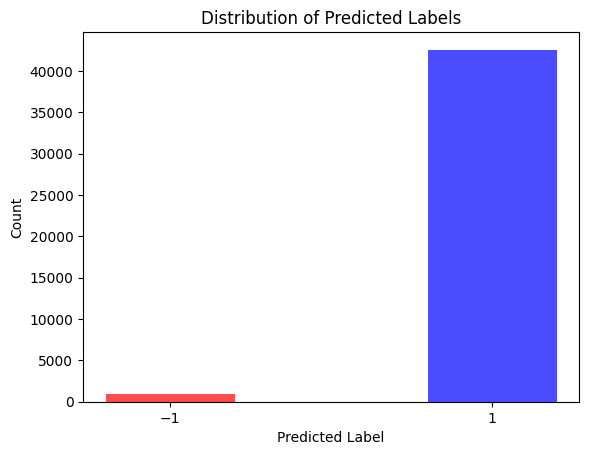

In [82]:
import matplotlib.pyplot as plt

# Plot the distribution of predicted labels
plt.bar(unique_labels, counts, color=['red', 'blue'], alpha=0.7)
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.title('Distribution of Predicted Labels')
plt.xticks(unique_labels)
plt.show()


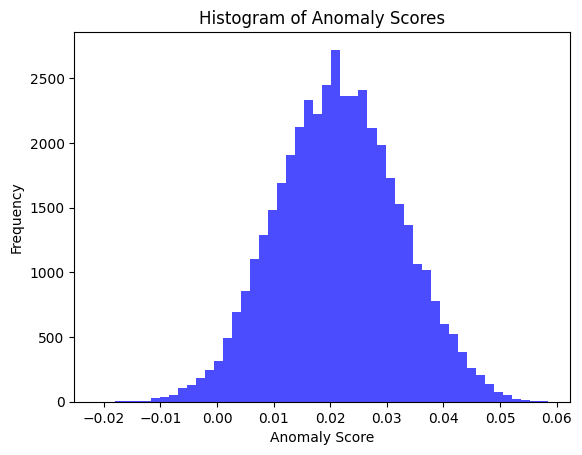

In [83]:
# Get anomaly scores from the Isolation Forest model
anomaly_scores = model.decision_function(X_test)

# Plot histogram of anomaly scores
plt.hist(anomaly_scores, bins=50, color='blue', alpha=0.7)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')
plt.show() 

# Saving the Model 

In [84]:
import pickle

# Specify the file path where you want to save the model
model_file_path = 'isolation_forest_model.pkl'

# Save the model to the specified file path
pickle.dump(model, open(model_file_path,'wb'))

# Loading the model 

In [85]:
loaded_model = pickle.load(open('isolation_forest_model.pkl','rb'))